## Visualizing solutions to simultaneous eigenstates of orbital angular momentum

In [4]:
%matplotlib inline
'''
### Probability Density From Solutions to the Eigenstate of Angular Momentum: Spherical Harmonics

Angus Lowe
Nanyang Technological University
2017

'''
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

Given l and m quantum numbers the following code will plot the solid contour of the 3-d probability density funcction with the z-axis pointing in the direction of the observer.

In [2]:
#recursive derivative
def recursive_deriv(f,k):
    def compute(x,dx=0.001):
        return (f(x+dx) - f(x))/dx
    if(k==0):
        return f
    if(k==1):
        return compute
    else:
        return recursive_deriv(compute,k-1)

#legendre polynomials
def legendre(x,n):
    def f(x):
        result = (x**2-1)**n
        return (x**2-1)**n
    df = recursive_deriv(f,n)
    p_n = 1.0/(2**n*np.math.factorial(n))*df(x)
    return p_n

def compute_theta_term(theta,l,m):
    cos_term = np.cos(theta)
    legendre_term = legendre(cos_term,l)
    return legendre_term**m

def compute_phi_term(phi,m):
    return np.exp(1j*m*phi)

def compute_factor(l,m):
    a = (-1)**m
    s = (2*l+1)*np.math.factorial(l-m)
    t = 4*np.pi*np.math.factorial(l+m)
    b = np.sqrt(s/t)
    return a*b


def Y_l_m(theta,phi,l,m):
    if(m == 0):
        return legendre(np.cos(theta),l)
    else:
        a = compute_factor(l,m)
        b = compute_theta_term(theta,l,m)
        c = compute_phi_term(phi,m)
        return a*b*c


#make data
def draw(l,m):
    if(m<-l or m>l):
        print "Invalid quantum numbers"
    else:
        theta, phi = np.linspace(0, 2 * np.pi, 50), np.linspace(-np.pi, np.pi, 50)
        THETA, PHI = np.meshgrid(theta, phi)
        R = np.absolute(Y_l_m(THETA,PHI,l,m))
        X = R * np.sin(PHI) * np.cos(THETA)
        Y = R * np.sin(PHI) * np.sin(THETA)
        Z = R * np.cos(PHI)

        fig = plt.figure()
        #ax = fig.add_subplot(111, projection='3d')   
        plt.contourf(X,Y,Z)
        #plot = ax.plot_surface(
        #    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
        #    linewidth=0, antialiased=False, alpha=0.5)

        plt.show()


<IPython.core.display.Javascript object>


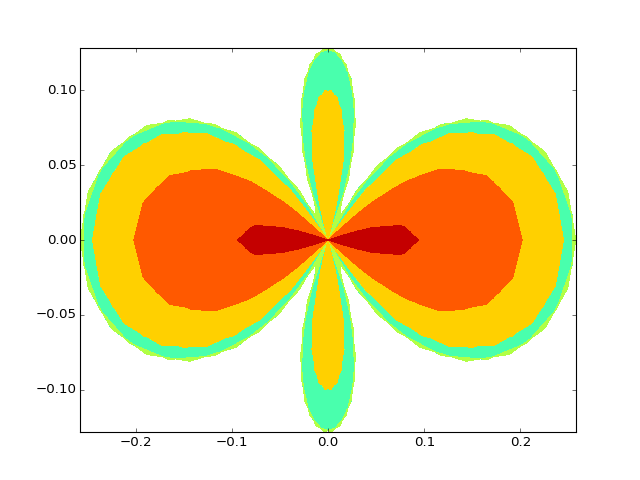

In [3]:
draw(2,1)